In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Printing the dataset and normalizing the values

In [3]:
# one tdcsfog file
tdcsfog_003f117e14 = pd.read_csv('D:\\SNU Classes\\4th Year\\Project\\train\\tdcsfog\\003f117e14.csv')
tdcsfog_003f117e14.head(5)

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.533939,0.566322,-1.413525,0,0,0
1,1,-9.536140,0.564137,-1.440621,0,0,0
2,2,-9.529345,0.561765,-1.429332,0,0,0
3,3,-9.531239,0.564227,-1.415490,0,0,0
4,4,-9.540825,0.561854,-1.429471,0,0,0


In [54]:
# Normalize the time column of tdcsfog
tdcsfog_003f117e14.Time = tdcsfog_003f117e14.Time / (len(tdcsfog_003f117e14) -1)
tdcsfog_003f117e14

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0.000000,-9.533939,0.566322,-1.413525,0,0,0
1,0.000214,-9.536140,0.564137,-1.440621,0,0,0
2,0.000427,-9.529345,0.561765,-1.429332,0,0,0
3,0.000641,-9.531239,0.564227,-1.415490,0,0,0
4,0.000855,-9.540825,0.561854,-1.429471,0,0,0
...,...,...,...,...,...,...,...
4677,0.999145,-9.351431,0.370047,-2.286318,0,0,0
4678,0.999359,-9.341410,0.347721,-2.321991,0,0,0
4679,0.999573,-9.350667,0.361341,-2.297158,0,0,0
4680,0.999786,-9.343977,0.365726,-2.292650,0,0,0


In [55]:
# one defog file
defog_02ea782681 = pd.read_csv('D:\\SNU Classes\\4th Year\\Project\\train\\defog\\02ea782681.csv')
defog_02ea782681

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-1.000000,0.044129,-0.250000,0,0,0,False,False
1,1,-1.000000,0.034431,-0.250000,0,0,0,False,False
2,2,-1.000000,0.031250,-0.250000,0,0,0,False,False
3,3,-1.000000,0.031250,-0.250000,0,0,0,False,False
4,4,-1.000000,0.031250,-0.250000,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...
162902,162902,-1.007283,0.234375,-0.375000,0,0,0,False,False
162903,162903,-1.000000,0.234375,-0.369159,0,0,0,False,False
162904,162904,-0.994626,0.234375,-0.351954,0,0,0,False,False
162905,162905,-0.977308,0.234375,-0.336683,0,0,0,False,False


In [56]:
# Normalize the time column of defog
defog_02ea782681.Time = defog_02ea782681.Time / (len(defog_02ea782681) - 1)
defog_02ea782681

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0.000000,-1.000000,0.044129,-0.250000,0,0,0,False,False
1,0.000006,-1.000000,0.034431,-0.250000,0,0,0,False,False
2,0.000012,-1.000000,0.031250,-0.250000,0,0,0,False,False
3,0.000018,-1.000000,0.031250,-0.250000,0,0,0,False,False
4,0.000025,-1.000000,0.031250,-0.250000,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...
162902,0.999975,-1.007283,0.234375,-0.375000,0,0,0,False,False
162903,0.999982,-1.000000,0.234375,-0.369159,0,0,0,False,False
162904,0.999988,-0.994626,0.234375,-0.351954,0,0,0,False,False
162905,0.999994,-0.977308,0.234375,-0.336683,0,0,0,False,False


In [57]:
# Memory usage reduction function
def reduce_memory_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype.name
        if ((col_type != 'datetime64[ns]') & (col_type != 'category')):
            if (col_type != 'object'):
                c_min = df[col].min()
                c_max = df[col].max()

                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)

                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        pass
            else:
                df[col] = df[col].astype('category')
    mem_usg = df.memory_usage().sum() / 1024 ** 2 
    print("Memory usage became: ",mem_usg," MB")
    
    return df

# Concatenating all files in tdcsfog into a file and same with defog

In [58]:
# All files in tdcsfog is concatenated in a single file
# Set the directory path to the folder containing the CSV files.
tdcsfog_path = 'D:\\SNU Classes\\4th Year\\Project\\train\\tdcsfog'

# Initialize an empty list to store the dataframes.
tdcsfog_list = []

# Loop through each file in the directory and read it into a dataframe.
for file_name in os.listdir(tdcsfog_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(tdcsfog_path, file_name)
        file = pd.read_csv(file_path)
        file.Time = file.Time / (len(file) - 1)
        tdcsfog_list.append(file)

# Concatenate the dataframes vertically using pd.concat().
tdcsfog = pd.concat(tdcsfog_list, axis = 0)

# Show the concatenated dataframe.
tdcsfog

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0.000000,-9.533939,0.566322,-1.413525,0,0,0
1,0.000214,-9.536140,0.564137,-1.440621,0,0,0
2,0.000427,-9.529345,0.561765,-1.429332,0,0,0
3,0.000641,-9.531239,0.564227,-1.415490,0,0,0
4,0.000855,-9.540825,0.561854,-1.429471,0,0,0
...,...,...,...,...,...,...,...
4220,0.999053,-9.403467,0.089003,-3.220304,0,0,0
4221,0.999290,-9.404246,0.090531,-3.216584,0,0,0
4222,0.999527,-9.405770,0.084380,-3.224039,0,0,0
4223,0.999763,-9.403579,0.084236,-3.236686,0,0,0


In [61]:
# All files in defog is concatenated in a single file
# Set the directory path to the folder containing the CSV files.
defog_path = 'D:\\SNU Classes\\4th Year\\Project\\train\\defog'

# Initialize an empty list to store the dataframes.
defog_list = []

# Loop through each file in the directory and read it into a dataframe.
for file_name in os.listdir(defog_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(defog_path, file_name)
        file = pd.read_csv(file_path)
        file.Time = file.Time / (len(file) - 1)
        defog_list.append(file)

# Concatenate the dataframes vertically using pd.concat().
defog = pd.concat(defog_list, axis = 0)

# Show the concatenated dataframe.
defog

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0.000000,-1.000000,0.044129,-0.250000,0,0,0,False,False
1,0.000006,-1.000000,0.034431,-0.250000,0,0,0,False,False
2,0.000012,-1.000000,0.031250,-0.250000,0,0,0,False,False
3,0.000018,-1.000000,0.031250,-0.250000,0,0,0,False,False
4,0.000025,-1.000000,0.031250,-0.250000,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...
120027,0.999967,-0.962333,0.113288,-0.328300,0,0,0,False,False
120028,0.999975,-0.962351,0.109235,-0.324841,0,0,0,False,False
120029,0.999983,-0.956052,0.101676,-0.324484,0,0,0,False,False
120030,0.999992,-0.951245,0.097876,-0.322607,0,0,0,False,False


# Reducing memory usage of both tdcsfog and defog

In [60]:
# Memory reduction step
tdcsfog = reduce_memory_usage(tdcsfog)

Memory usage of dataframe is 127.97 MB
Memory usage became:  127.97428894042969  MB


In [62]:
defog = reduce_memory_usage(defog)

Memory usage of dataframe is 851.34 MB
Memory usage became:  296.6796360015869  MB


# Taking valid rows and the first 7 columns

In [63]:
# Take if both valid and task column of defog is true
defog = defog[(defog['Task'] == 1) & (defog['Valid'] == 1)]
defog = defog.iloc[:, :7]
defog

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
1000,0.006138,-0.970215,0.061615,-0.265625,0,0,0
1001,0.006145,-0.984375,0.044495,-0.265625,0,0,0
1002,0.006149,-0.984375,0.029022,-0.265625,0,0,0
1003,0.006157,-0.984375,0.015625,-0.265625,0,0,0
1004,0.006165,-0.984863,0.015327,-0.265625,0,0,0
...,...,...,...,...,...,...,...
119027,0.991699,-0.961426,0.142456,-0.289551,0,0,0
119028,0.991699,-0.960449,0.142822,-0.290527,0,0,0
119029,0.991699,-0.958008,0.145508,-0.290039,0,0,0
119030,0.991699,-0.960449,0.145874,-0.291504,0,0,0


# Concatenating tdcsfog and defog into merged

In [64]:
# Concatenate tdcsfog and defog
merged = pd.concat([tdcsfog, defog], axis = 0)
merged

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0.000000,-9.531250,0.566406,-1.413086,0,0,0
1,0.000214,-9.539062,0.563965,-1.440430,0,0,0
2,0.000427,-9.531250,0.561523,-1.429688,0,0,0
3,0.000641,-9.531250,0.564453,-1.415039,0,0,0
4,0.000854,-9.539062,0.562012,-1.429688,0,0,0
...,...,...,...,...,...,...,...
119027,0.991699,-0.961426,0.142456,-0.289551,0,0,0
119028,0.991699,-0.960449,0.142822,-0.290527,0,0,0
119029,0.991699,-0.958008,0.145508,-0.290039,0,0,0
119030,0.991699,-0.960449,0.145874,-0.291504,0,0,0


# Extracting the required variables

In [65]:
# Create input features and target variables
X_merged = merged.iloc[:, 0:4]  # input features
X = tdcsfog.iloc[:, 0:4]  # input features
y1 = merged['StartHesitation']  # target variable for StartHesitation
y2 = merged['Turn']  # target variable for Turn
y3 = tdcsfog['Walking']  # target variable for Walking

# Creating a balanced dataset of both 0 and 1 for all 3 columns

In [66]:
# For start Hesitation
# Find the positions of y1 where it equals 0.
y1_zeros = np.where(y1 == 0)[0]
y1_ones = np.where(y1 == 1)[0]

# Choose the same number of samples with y1 == 1 as there are with y1 == 0.
num1_ones = (y1 == 1).sum()
np.random.seed(42)
y1_zeros = np.random.choice(np.where(y1 == 0)[0], size = num1_ones, replace = False)

# Combine the positions of y1 == 0 and y1 == 1.
y1_balanced_idxs = np.sort(np.concatenate([y1_zeros, y1_ones]))

# Use the balanced indices to get the corresponding rows of X and y1.
X1_balanced = X_merged.iloc[y1_balanced_idxs, :]
y1_balanced = y1.iloc[y1_balanced_idxs]

In [67]:
# For Turn
# Find the positions of y2 where it equals 0.
y2_zeros = np.where(y2 == 0)[0]
y2_ones = np.where(y2 == 1)[0]

# Choose the same number of samples with y2 == 1 as there are with y2 == 0.
num2_ones = (y2 == 1).sum()
np.random.seed(42)
y2_zeros = np.random.choice(np.where(y2 == 0)[0], size = num2_ones, replace = False)

# Combine the positions of y2 == 0 and y2 == 1.
y2_balanced_idxs = np.sort(np.concatenate([y2_zeros, y2_ones]))

# Use the balanced indices to get the corresponding rows of X and y1.
X2_balanced = X_merged.iloc[y2_balanced_idxs, :]
y2_balanced = y2.iloc[y2_balanced_idxs]

In [68]:
# For Walking
# Find the positions of y3 where it equals 0.
y3_zeros = np.where(y3 == 0)[0]
y3_ones = np.where(y3 == 1)[0]

# Choose the same number of samples with y3 == 1 as there are with y3 == 0.
num3_ones = (y3 == 1).sum()
np.random.seed(42)
y3_zeros = np.random.choice(np.where(y3 == 0)[0], size = num3_ones, replace = False)

# Combine the positions of y3 == 0 and y3 == 1.
y3_balanced_idxs = np.sort(np.concatenate([y3_zeros, y3_ones]))

# Use the balanced indices to get the corresponding rows of X and y3.
X3_balanced = X.iloc[y3_balanced_idxs, :]
y3_balanced = y3.iloc[y3_balanced_idxs]

# Split the data into training and testing sets

In [69]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1_balanced, y1_balanced, test_size = 0.2, random_state = 42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_balanced, y2_balanced, test_size = 0.2, random_state = 42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_balanced, y3_balanced, test_size = 0.2, random_state = 42)

# Standardize the independent variables

In [70]:
from sklearn.preprocessing import StandardScaler

# Standardize the independent variables.
scaler1 = StandardScaler()
X1_train = scaler1.fit_transform(X1_train)
X1_test = scaler1.transform(X1_test)

scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.transform(X2_test)

scaler3 = StandardScaler()
X3_train = scaler3.fit_transform(X3_train)
X3_test = scaler3.transform(X3_test)

# Using different Models

In [71]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create three separate logistic regression models.
model1 = LogisticRegression()
model2 = LogisticRegression()
model3 = LogisticRegression()

# Train the models on the training data.
model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)
model3.fit(X3_train, y3_train)

# Evaluate the models on the test data.
print('Accuracy for StartHesitation:', model1.score(X1_test, y1_test))
print('Accuracy for Turn:', model2.score(X2_test, y2_test))
print('Accuracy for Walking:', model3.score(X3_test, y3_test))

Accuracy for StartHesitation: 0.8368354679157523
Accuracy for Turn: 0.606668174720964
Accuracy for Walking: 0.7424461123941494


In [26]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Create three separate KNN models.
knn_model1 = KNeighborsClassifier()
knn_model2 = KNeighborsClassifier()
knn_model3 = KNeighborsClassifier()

# Train the KNN models on the training data.
knn_model1.fit(X1_train, y1_train)
knn_model2.fit(X2_train, y2_train)
knn_model3.fit(X3_train, y3_train)

# Evaluate the KNN models on the test data.
print('Accuracy for StartHesitation:', knn_model1.score(X1_test, y1_test))
print('Accuracy for Turn:', knn_model2.score(X2_test, y2_test))
print('Accuracy for Walking:', knn_model3.score(X3_test, y3_test))

Accuracy for StartHesitation: 0.9132382325002457
Accuracy for Turn: 0.7821582463903249
Accuracy for Walking: 0.8191036374133949


In [127]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Create three separate Decision Tree models.
dt_model1 = DecisionTreeClassifier()
dt_model2 = DecisionTreeClassifier()
dt_model3 = DecisionTreeClassifier()

# Train the Decision Tree models on the training data.
dt_model1.fit(X1_train, y1_train)
dt_model2.fit(X2_train, y2_train)
dt_model3.fit(X3_train, y3_train)

# Evaluate the Decision Tree models on the test data.
print('Accuracy for StartHesitation:', dt_model1.score(X1_test, y1_test))
print('Accuracy for Turn:', dt_model2.score(X2_test, y2_test))
print('Accuracy for Walking:', dt_model3.score(X3_test, y3_test))

Accuracy for StartHesitation: 0.9011677421468113
Accuracy for Turn: 0.7637581448725235
Accuracy for Walking: 0.8002309468822171


In [81]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create three separate Random Forest models.
rf_model1 = RandomForestClassifier()
rf_model2 = RandomForestClassifier()
rf_model3 = RandomForestClassifier()

# Train the Random Forest models on the training data.
rf_model1.fit(X1_train, y1_train)
rf_model2.fit(X2_train, y2_train)
rf_model3.fit(X3_train, y3_train)

# Evaluate the Random Forest models on the test data.
print('Accuracy for StartHesitation:', rf_model1.score(X1_test, y1_test))
print('Accuracy for Turn:', rf_model2.score(X2_test, y2_test))
print('Accuracy for Walking:', rf_model3.score(X3_test, y3_test))

Accuracy for StartHesitation: 0.9313439680303973
Accuracy for Turn: 0.8154505680031338
Accuracy for Walking: 0.8525307929176289


In [132]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB

# Create three separate Naive Bayes models.
nb_model1 = GaussianNB()
nb_model2 = GaussianNB()
nb_model3 = GaussianNB()

# Train the Naive Bayes models on the training data.
nb_model1.fit(X1_train, y1_train)
nb_model2.fit(X2_train, y2_train)
nb_model3.fit(X3_train, y3_train)

# Evaluate the Naive Bayes models on the test data.
print('Accuracy for StartHesitation:', nb_model1.score(X1_test, y1_test))
print('Accuracy for Turn:', nb_model2.score(X2_test, y2_test))
print('Accuracy for Walking:', nb_model3.score(X3_test, y3_test))


C:\python39\lib\site-packages\numpy\core\_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
C:\python39\lib\site-packages\numpy\core\_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
C:\python39\lib\site-packages\numpy\core\_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Accuracy for StartHesitation: 0.4989108716302532
Accuracy for Turn: 0.5001175178897539
Accuracy for Walking: 0.5000962278675904


# Showing accuracy of models in graphs

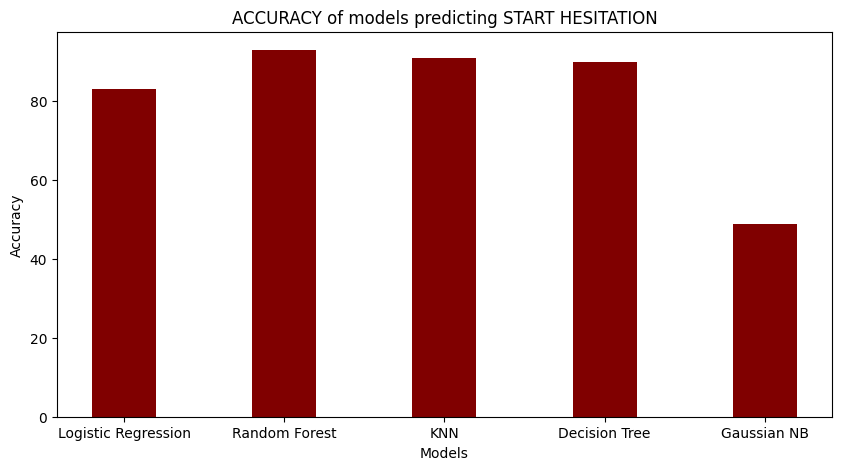

In [77]:
# Accuracy for Start Hesitation
data = {'Logistic Regression':83, 'Random Forest':93, 'KNN':91, 
        'Decision Tree':90, 'Gaussian NB':49}
accuracy = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(accuracy, values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("ACCURACY of models predicting START HESITATION")
plt.show()

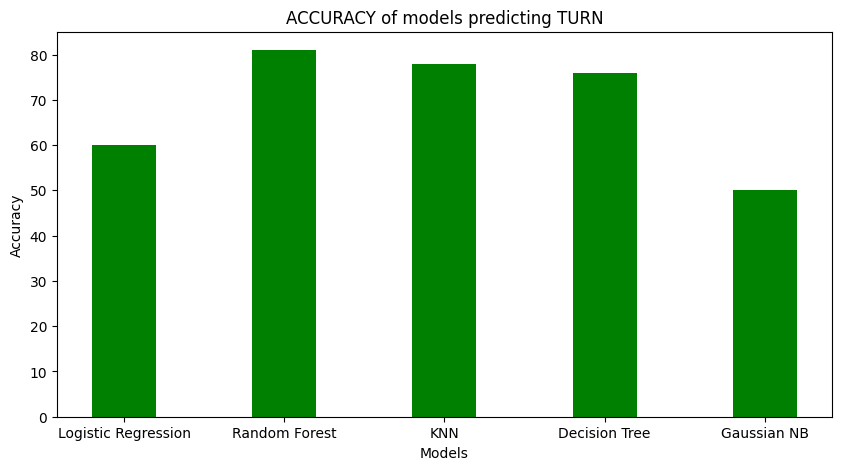

In [78]:
# Accuracy for Turn
data = {'Logistic Regression':60, 'Random Forest':81, 'KNN':78, 
        'Decision Tree':76, 'Gaussian NB':50}
accuracy = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(accuracy, values, color ='green', 
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("ACCURACY of models predicting TURN")
plt.show()

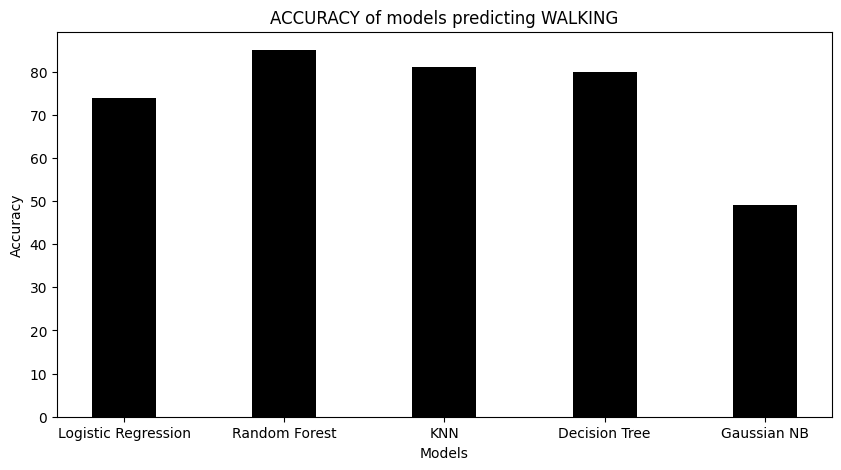

In [79]:
# Accuracy for Walking
data = {'Logistic Regression':74, 'Random Forest':85, 'KNN':81, 
        'Decision Tree':80, 'Gaussian NB':49}
accuracy = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(accuracy, values, color ='black', 
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("ACCURACY of models predicting WALKING")
plt.show()

# Confusion Matrix and Classification Report

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the predictions for the three models on the test data.
y1_pred = rf_model1.predict(X1_test)
y2_pred = rf_model2.predict(X2_test)
y3_pred = rf_model3.predict(X3_test)

# Create a classification report for each model.
print('Classification Report for StartHesitation:')
print(classification_report(y1_test, y1_pred))

print('Classification Report for Turn:')
print(classification_report(y2_test, y2_pred))

print('Classification Report for Walking:')
print(classification_report(y3_test, y3_pred))


Classification Report for StartHesitation:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     60925
           1       0.91      0.95      0.93     61191

    accuracy                           0.93    122116
   macro avg       0.93      0.93      0.93    122116
weighted avg       0.93      0.93      0.93    122116

Classification Report for Turn:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81    453229
           1       0.80      0.85      0.82    453016

    accuracy                           0.82    906245
   macro avg       0.82      0.82      0.82    906245
weighted avg       0.82      0.82      0.82    906245

Classification Report for Walking:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85     41576
           1       0.83      0.89      0.86     41560

    accuracy                           0.85     83136
   macro avg      

# Visualization of confusion matrices

Text(50.72222222222221, 0.5, 'Truth')

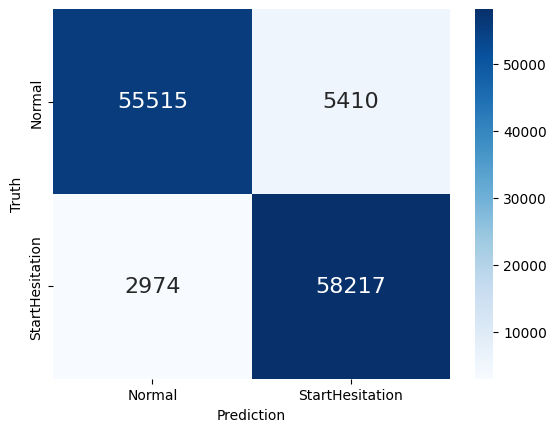

In [84]:
# Start Hesitation
cm = confusion_matrix(y1_test, y1_pred)

# Define the class names.
class_names = ['Normal', 'StartHesitation']

# Create the heatmap with class names as tick labels.
ax = sns.heatmap(cm, annot = True, fmt = '.0f', cmap = "Blues", annot_kws = {"size": 16},\
           xticklabels = class_names, yticklabels = class_names)

# Set the axis labels.
ax.set_xlabel("Prediction")
ax.set_ylabel("Truth")

Text(50.722222222222214, 0.5, 'Truth')

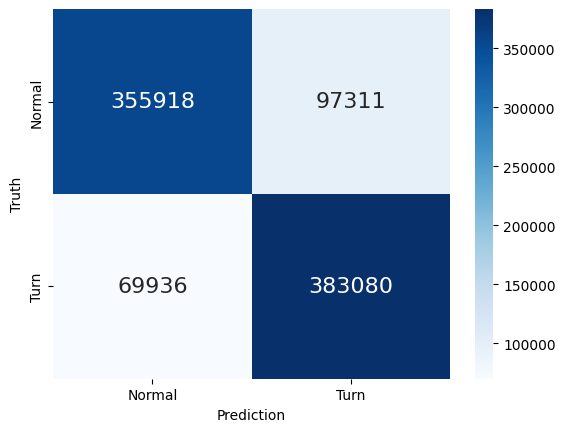

In [85]:
cm = confusion_matrix(y2_test, y2_pred)

# Define the class names.
class_names = ['Normal', 'Turn']

# Create the heatmap with class names as tick labels.
ax = sns.heatmap(cm, annot = True, fmt = '.0f', cmap = "Blues", annot_kws = {"size": 16},\
           xticklabels = class_names, yticklabels = class_names)

# Set the axis labels.
ax.set_xlabel("Prediction")
ax.set_ylabel("Truth")

Text(50.722222222222214, 0.5, 'Truth')

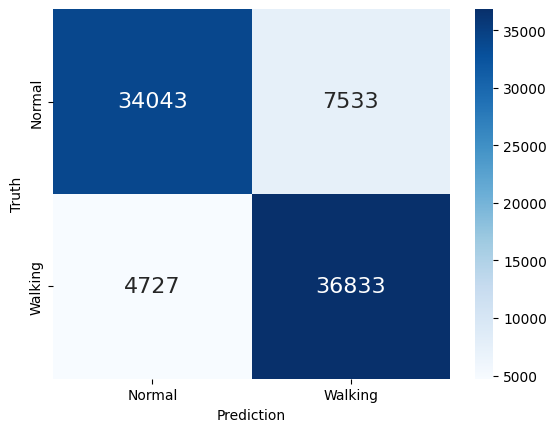

In [86]:
cm = confusion_matrix(y3_test, y3_pred)

# Define the class names.
class_names = ['Normal', 'Walking']

# Create the heatmap with class names as tick labels.
ax = sns.heatmap(cm, annot = True, fmt = '.0f', cmap = "Blues", annot_kws = {"size": 16},\
           xticklabels = class_names, yticklabels = class_names)

# Set the axis labels.
ax.set_xlabel("Prediction")
ax.set_ylabel("Truth")

# Preparing dataset for testing

In [31]:
# tdcsfog dataset
# Set the directory path to the folder containing the CSV files.
tdcsfog_test_path = 'D:\\SNU Classes\\4th Year\\Project\\test\\tdcsfog'

# Initialize an empty list to store the dataframes.
tdcsfog_test_list = []

# Loop through each file in the directory and read it into a dataframe.
for file_name in os.listdir(tdcsfog_test_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(tdcsfog_test_path, file_name)
        file = pd.read_csv(file_path)
        file['Id'] = file_name[:-4] + '_' + file['Time'].apply(str)
        file.Time = file.Time / (len(file) - 1)
        tdcsfog_test_list.append(file)

# Concatenate the dataframes vertically using pd.concat().
tdcsfog_test = pd.concat(tdcsfog_test_list, axis = 0)

# Show the concatenated dataframe.
tdcsfog_test

,Time,AccV,AccML,AccAP,Id
0,0.000000,-9.533939,0.566322,-1.413525,003f117e14_0
1,0.000214,-9.536140,0.564137,-1.440621,003f117e14_1
2,0.000427,-9.529345,0.561765,-1.429332,003f117e14_2
3,0.000641,-9.531239,0.564227,-1.415490,003f117e14_3
4,0.000855,-9.540825,0.561854,-1.429471,003f117e14_4
...,...,...,...,...,...
4677,0.999145,-9.351431,0.370047,-2.286318,003f117e14_4677
4678,0.999359,-9.341410,0.347721,-2.321991,003f117e14_4678
4679,0.999573,-9.350667,0.361341,-2.297158,003f117e14_4679
4680,0.999786,-9.343977,0.365726,-2.292650,003f117e14_4680


In [33]:
# defog dataset
# Set the directory path to the folder containing the CSV files.
defog_test_path = 'D:\\SNU Classes\\4th Year\\Project\\test\\defog'

# Initialize an empty list to store the dataframes.
defog_test_list = []

# Loop through each file in the directory and read it into a dataframe.
for file_name in os.listdir(defog_test_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(defog_test_path, file_name)
        file = pd.read_csv(file_path)
        file['Id'] = file_name[:-4] + '_' + file['Time'].apply(str)
        file.Time = file.Time / (len(file) - 1)
        defog_test_list.append(file)

# Concatenate the dataframes vertically using pd.concat().
defog_test = pd.concat(defog_test_list, axis = 0)

# Show the concatenated dataframe.
defog_test

,Time,AccV,AccML,AccAP,Id
0,0.000000,-0.914652,-0.300851,0.298156,02ab235146_0
1,0.000004,-0.914367,-0.301572,0.298325,02ab235146_1
2,0.000007,-0.779540,-0.343197,0.275690,02ab235146_2
3,0.000011,-0.993162,-0.270281,0.315775,02ab235146_3
4,0.000014,-0.948767,-0.307849,0.297191,02ab235146_4
...,...,...,...,...,...
281683,0.999986,-0.899299,-0.232668,0.389147,02ab235146_281683
281684,0.999989,-0.901973,-0.233051,0.390114,02ab235146_281684
281685,0.999993,-0.901690,-0.231888,0.391896,02ab235146_281685
281686,0.999996,-0.899576,-0.232429,0.391106,02ab235146_281686


In [34]:
# Redcing memory usage of defog
defog_test = reduce_memory_usage(defog_test)

Memory usage of dataframe is 10.75 MB
Memory usage became:  13.435432434082031  MB


In [35]:
# Redcing memory usage of tdcsfog
tdcsfog_test = reduce_memory_usage(tdcsfog_test)

Memory usage of dataframe is 0.18 MB
Memory usage became:  0.20650863647460938  MB


In [36]:
# Merging tdcsfof and defog into test
test = pd.concat([tdcsfog_test, defog_test], axis = 0).reset_index(drop = True)
test

,Time,AccV,AccML,AccAP,Id
0,0.000000,-9.531250,0.566406,-1.413086,003f117e14_0
1,0.000214,-9.539062,0.563965,-1.440430,003f117e14_1
2,0.000427,-9.531250,0.561523,-1.429688,003f117e14_2
3,0.000641,-9.531250,0.564453,-1.415039,003f117e14_3
4,0.000854,-9.539062,0.562012,-1.429688,003f117e14_4
...,...,...,...,...,...
286365,1.000000,-0.899414,-0.232666,0.389160,02ab235146_281683
286366,1.000000,-0.901855,-0.233032,0.390137,02ab235146_281684
286367,1.000000,-0.901855,-0.231934,0.391846,02ab235146_281685
286368,1.000000,-0.899414,-0.232422,0.391113,02ab235146_281686


In [38]:
# Separate the dataset for the independent variables which will be fed to the model
test_X = test.iloc[:, 0:4]

# Standardize the independent variables by a new scaler.
scaler = StandardScaler()
scaler.fit(test_X)
test_X = scaler.transform(test_X)

In [87]:
# Predicting the StartHesitation, Turn, Walking
# Get the predictions for the three models on the test data.
pred_y1 = rf_model1.predict(test_X)
pred_y2 = rf_model2.predict(test_X)
pred_y3 = rf_model3.predict(test_X)

test['StartHesitation'] = pred_y1 # target variable for StartHesitation
test['Turn'] = pred_y2 # target variable for Turn
test['Walking'] = pred_y3 # target variable for Walking

# Get the probability predictions for the three models on the test data.
pred_proba_y1 = rf_model1.predict_proba(test_X)[:, 1]
pred_proba_y2 = rf_model2.predict_proba(test_X)[:, 1]
pred_proba_y3 = rf_model3.predict_proba(test_X)[:, 1]

# Update the values in the test dataframe.
test['StartHesitation'] = pred_proba_y1
test['Turn'] = pred_proba_y2
test['Walking'] = pred_proba_y3

test

,Time,AccV,AccML,AccAP,Id,StartHesitation,Turn,Walking
0,0.000000,-9.531250,0.566406,-1.413086,003f117e14_0,0.48,0.01,0.03
1,0.000214,-9.539062,0.563965,-1.440430,003f117e14_1,0.48,0.01,0.03
2,0.000427,-9.531250,0.561523,-1.429688,003f117e14_2,0.48,0.01,0.03
3,0.000641,-9.531250,0.564453,-1.415039,003f117e14_3,0.48,0.01,0.03
4,0.000854,-9.539062,0.562012,-1.429688,003f117e14_4,0.48,0.01,0.03
...,...,...,...,...,...,...,...,...
286365,1.000000,-0.899414,-0.232666,0.389160,02ab235146_281683,0.64,0.63,0.15
286366,1.000000,-0.901855,-0.233032,0.390137,02ab235146_281684,0.64,0.63,0.15
286367,1.000000,-0.901855,-0.231934,0.391846,02ab235146_281685,0.63,0.63,0.15
286368,1.000000,-0.899414,-0.232422,0.391113,02ab235146_281686,0.64,0.63,0.15


In [88]:
# Storing the last 4 columns of test in prediction
predictions = test.iloc[:, 4:].fillna(0.0)
predictions

,Id,StartHesitation,Turn,Walking
0,003f117e14_0,0.48,0.01,0.03
1,003f117e14_1,0.48,0.01,0.03
2,003f117e14_2,0.48,0.01,0.03
3,003f117e14_3,0.48,0.01,0.03
4,003f117e14_4,0.48,0.01,0.03
...,...,...,...,...
286365,02ab235146_281683,0.64,0.63,0.15
286366,02ab235146_281684,0.64,0.63,0.15
286367,02ab235146_281685,0.63,0.63,0.15
286368,02ab235146_281686,0.64,0.63,0.15


In [89]:
predictions.to_csv("prediction.csv", index = False)

In [94]:
import joblib

# Save the model to disk.
joblib.dump(rf_model1, 'rf_model1.joblib')
joblib.dump(rf_model2, 'rf_model2.joblib')
joblib.dump(rf_model3, 'rf_model3.joblib')

# Load the saved models from disk.
'''model1_loaded = joblib.load('model1.joblib')
model2_loaded = joblib.load('model2.joblib')
model3_loaded = joblib.load('model3.joblib')

# Use the loaded models to make predictions on test data.
y1_pred_loaded = model1_loaded.predict(test_X)
y2_pred_loaded = model2_loaded.predict(test_X)
y3_pred_loaded = model3_loaded.predict(test_X)


['rf_model3.joblib']

# Testing with other data ***

In [45]:
test2 = pd.read_csv('D:\\SNU Classes\\4th Year\\Project\\train\\tdcsfog\\0c4742dfa9.csv')
test2

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.258323,-0.244795,-2.369781,0,0,0
1,1,-9.256824,-0.236408,-2.363312,0,0,0
2,2,-9.254396,-0.233997,-2.374510,0,0,0
3,3,-9.257946,-0.242155,-2.385396,0,0,0
4,4,-9.251202,-0.228594,-2.378540,0,0,0
...,...,...,...,...,...,...,...
8764,8764,-9.422538,-0.198512,-1.640492,0,0,0
8765,8765,-9.411169,-0.191765,-1.638150,0,0,0
8766,8766,-9.417714,-0.180035,-1.640220,0,0,0
8767,8767,-9.418484,-0.183032,-1.642869,0,0,0


In [46]:
test2 = test2.iloc[:, :4]
test2

,Time,AccV,AccML,AccAP
0,0,-9.258323,-0.244795,-2.369781
1,1,-9.256824,-0.236408,-2.363312
2,2,-9.254396,-0.233997,-2.374510
3,3,-9.257946,-0.242155,-2.385396
4,4,-9.251202,-0.228594,-2.378540
...,...,...,...,...
8764,8764,-9.422538,-0.198512,-1.640492
8765,8765,-9.411169,-0.191765,-1.638150
8766,8766,-9.417714,-0.180035,-1.640220
8767,8767,-9.418484,-0.183032,-1.642869


In [47]:
test2.Time = test2.Time / (len(test2) -1)
test2

,Time,AccV,AccML,AccAP
0,0.000000,-9.258323,-0.244795,-2.369781
1,0.000114,-9.256824,-0.236408,-2.363312
2,0.000228,-9.254396,-0.233997,-2.374510
3,0.000342,-9.257946,-0.242155,-2.385396
4,0.000456,-9.251202,-0.228594,-2.378540
...,...,...,...,...
8764,0.999544,-9.422538,-0.198512,-1.640492
8765,0.999658,-9.411169,-0.191765,-1.638150
8766,0.999772,-9.417714,-0.180035,-1.640220
8767,0.999886,-9.418484,-0.183032,-1.642869


In [48]:
# Separate the dataset for the independent variables which will be fed to the model
test2_X = test2.iloc[:, 0:4]

# Standardize the independent variables by a new scaler.
scaler = StandardScaler()
scaler.fit(test2_X)
test2_X = scaler.transform(test2_X)

In [49]:
# Use the loaded models to make predictions on test data.
y1_pred_loaded = knn_model1_loaded.predict(test2_X)
y2_pred_loaded = knn_model2_loaded.predict(test2_X)
y3_pred_loaded = knn_model3_loaded.predict(test2_X)

test2['StartHesitation'] = y1_pred_loaded # target variable for StartHesitation
test2['Turn'] = y2_pred_loaded # target variable for Turn
test2['Walking'] = y3_pred_loaded # target variable for Walking

# Get the probability predictions for the three models on the test data.
pred_proba_y1_loaded = knn_model1.predict_proba(test2_X)[:, 1]
pred_proba_y2_loaded = knn_model2.predict_proba(test2_X)[:, 1]
pred_proba_y3_loaded = knn_model3.predict_proba(test2_X)[:, 1]

# Update the values in the test dataframe.
test2['StartHesitation'] = pred_proba_y1_loaded
test2['Turn'] = pred_proba_y2_loaded
test2['Walking'] = pred_proba_y3_loaded

test2

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0.000000,-9.258323,-0.244795,-2.369781,0.8,0.0,0.0
1,0.000114,-9.256824,-0.236408,-2.363312,0.8,0.0,0.0
2,0.000228,-9.254396,-0.233997,-2.374510,0.8,0.0,0.0
3,0.000342,-9.257946,-0.242155,-2.385396,0.8,0.0,0.0
4,0.000456,-9.251202,-0.228594,-2.378540,0.8,0.0,0.0
...,...,...,...,...,...,...,...
8764,0.999544,-9.422538,-0.198512,-1.640492,0.0,0.0,0.0
8765,0.999658,-9.411169,-0.191765,-1.638150,0.0,0.0,0.0
8766,0.999772,-9.417714,-0.180035,-1.640220,0.0,0.0,0.0
8767,0.999886,-9.418484,-0.183032,-1.642869,0.0,0.0,0.0


In [50]:
test2.tail(5)

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
8764,0.999544,-9.422538,-0.198512,-1.640492,0.0,0.0,0.0
8765,0.999658,-9.411169,-0.191765,-1.638150,0.0,0.0,0.0
8766,0.999772,-9.417714,-0.180035,-1.640220,0.0,0.0,0.0
8767,0.999886,-9.418484,-0.183032,-1.642869,0.0,0.0,0.0
8768,1.000000,-9.406285,-0.189205,-1.646993,0.0,0.0,0.0
